# First Exam

Gabriel Hoyos
Daniel Cordero

# Preguntas

How does the pricing differ depending on the brand.
	
Topic modelling on the product description
	
What are the most common color used by different brands?
	
Analyses on the product rating
	
Common style attributes (wherever applicable)

In [15]:
import numpy
import io
import sys
import os
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import re

PATH= '/Data'
DIR_DATA='../Data/'
sys.path.append(PATH) if PATH not in list(sys.path) else None

file_1= DIR_DATA + 'ae_com.csv' 
file_2= DIR_DATA + 'amazon_com.csv'
file_3= DIR_DATA + 'btemptd_com.csv'
file_4= DIR_DATA + 'calvinklein_com.csv'
file_5= DIR_DATA + 'hankypanky_com.csv'
file_6= DIR_DATA + 'macys_com.csv'
file_7= DIR_DATA + 'shop_nordstrom_com.csv'
file_8= DIR_DATA + 'us_topshop_com.csv'
file_9= DIR_DATA + 'victoriassecret_com.csv'

data_1= pd.read_csv(file_1,sep=',',header=0)
data_2= pd.read_csv(file_2,sep=',',header=0)
data_3= pd.read_csv(file_3,sep=',',header=0)
data_4= pd.read_csv(file_4,sep=',',header=0)
data_5= pd.read_csv(file_5,sep=',',header=0)
data_6= pd.read_csv(file_6,sep=',',header=0)
data_7= pd.read_csv(file_7,sep=',',header=0)
data_8= pd.read_csv(file_8,sep=',',header=0)
data_9= pd.read_csv(file_9,sep=',',header=0)


data=pd.concat([data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8, data_9], ignore_index = True)
print(data.shape)

(613143, 14)


In [3]:
data.head()

product_name        mrp      price  \
0  Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
1  Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
2  Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
3  Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   
4  Aerie Everyday Loves Lace Cheeky  12.50 USD  12.50 USD   

                                             pdp_url brand_name  \
0  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
1  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
2  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
3  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
4  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   

  product_category retailer  \
0         Cheekies    Ae US   
1         Cheekies    Ae US   
2         Cheekies    Ae US   
3         Cheekies    Ae US   
4         Cheekies    Ae US   

                                         description  rating  review_count  \
0  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
1  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
2  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
3  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
4  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   

                                    style_attributes  \
0  ["Soft lace with the right amount of stretch",...   
1  ["Soft lace with the right amount of stretch",...   
2  ["Soft lace with the right amount of stretch",...   
3  ["Soft lace with the right amount of stretch",...   
4  ["Soft lace with the right amount of stretch",...   

                          total_sizes                      available_size  \
0  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
1  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
2  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
3  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
4  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   

          color  
0  Rugged Green  
1  Natural Nude  
2    True Black  
3         White  
4    Royal Navy

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613143 entries, 0 to 613142
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      613143 non-null  object 
 1   mrp               613143 non-null  object 
 2   price             613143 non-null  object 
 3   pdp_url           613143 non-null  object 
 4   brand_name        613143 non-null  object 
 5   product_category  613143 non-null  object 
 6   retailer          613143 non-null  object 
 7   description       613143 non-null  object 
 8   rating            233556 non-null  float64
 9   review_count      222030 non-null  float64
 10  style_attributes  156675 non-null  object 
 11  total_sizes       613143 non-null  object 
 12  available_size    613143 non-null  object 
 13  color             612466 non-null  object 
dtypes: float64(2), object(12)
memory usage: 65.5+ MB


# Mrp-Object, Price- Object, Rating, Review_count, Style_attributes, Color

In [5]:
data['price'].unique()

array(['12.50 USD', '9.50 USD', '7.50 USD', ..., 'Rp474.522', 'Rp543.294',
       'Rp343.857'], dtype=object)

In [6]:
data['mrp'].unique()

array(['12.50 USD', '9.50 USD', '7.50 USD', '14.50 USD', '49.95 USD',
       '44.95 USD', '29.95 USD', '22.95 USD', '39.95 USD', '26.95 USD',
       '69.99 USD', '24.95 USD', '32.95 USD', '34.95 USD', '36.95 USD',
       '72.99 USD', '66.99 USD', '15.50 USD', '38.50 USD', '11.50 USD',
       '36.50 USD', '$36.00 ', '$27.00 ', '$65.00 ', '$55.00 ', '$44.00 ',
       '$20.00 ', '$50.00 ', '$38.00 ', '$33.00 ', '$60.00 ', '$46.00 ',
       '$48.00 ', '$58.00 ', '$39.99 ', '$39.00 ', '$35.98 ', '$22.00 ',
       '$18.00 ', '$19.28 ', '$41.79 ', '$42.00 ', '$13.00 ', '$24.99 ',
       '$18.77 ', '$54.99 ', '$38.99 ', '$32.00 ', '$34.00 ', '$68.00 ',
       '$43.92 ', '$58.20 ', '$64.90 ', '$49.95 ', '$70.40 ', '$33.63 ',
       '$37.47 ', '$12.00 ', '$49.99 ', '$72.00 ', '$28.50 ', '$30.00 ',
       '$31.95 ', '$47.65 ', '$34.99 ', '$41.00 ', '$49.67 ', '$44.95 ',
       '$51.99 ', '$59.99 ', '$29.00 ', '$21.90 ', '$21.41 ', '$37.95 ',
       '$45.99 ', '$19.99 ', '$52.99 ', '$36.48 ', '$26

In [7]:
def deletenumbers(value_str):
    if type(value_str) is str:
        pattern= r'[0-9]'
        value_str=re.sub(pattern, '',value_str)
        value_str.strip()
        
        return value_str
    else:
        return value_str

In [8]:
data['price']=data['price'].apply(deletenumbers)

In [9]:
data['mrp']=data['mrp'].apply(deletenumbers)

In [10]:
data['price'].unique()

array(['. USD', '$. ', '$. - $.', '$ ', '$.–$.', '\xa0$.',
       '\xa0$.\n\t\t\t\t\t            \t\t\t\t\t\t\t\t            \t\t\t\t\t            \t\t\t\n\t\t\t\t\t            \t\t\n\t\t\t\t\t\t            \t\t\t\tNow\xa0$.',
       '₡.', 'Rp.'], dtype=object)

In [11]:
data['mrp'].unique()

array(['. USD', '$. ', '$ ', '$.–$.', '\xa0$.',
       '\xa0$.\n\t\t\t\t\t            \t\t\t\t\t\t\t\t            \t\t\t\t\t            \t\t\t\n\t\t\t\t\t            \t\t\n\t\t\t\t\t\t            \t\t\t\tNow\xa0$.',
       '₡.', 'Rp.'], dtype=object)

# ₡-Rp

In [12]:
colon_to_dollar=0.0016
rupia_to_dollar=0.013

In [13]:
def extract_usd_value(value_str):
    if type(value_str) is str:
        value_str= value_str.strip().lower().replace('usd', '').replace('$','').replace("\-.*","").strip()
        value_str = re.sub(r"-.*", "", value_str)
        value_str = re.sub(r"–.*", "", value_str)
        value_str = re.sub(r"\s.*", "", value_str)
        value_str.strip()
        
        if "₡" in value_str:
            value_str = value_str.replace("₡", "").strip()
            value_str = pd.to_numeric(value_str) * colon_to_dollar            
        elif "rp" in value_str:
            value_str = value_str.replace("rp", "").strip()
            value_str = pd.to_numeric(value_str) * rupia_to_dollar                
            
        return value_str
    else:
        return value_str

In [16]:
data['mrp']=data['mrp'].apply(extract_usd_value).apply(pd.to_numeric)
data['price']=data['price'].apply(extract_usd_value).apply(pd.to_numeric)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613143 entries, 0 to 613142
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   product_name      613143 non-null  object 
 1   mrp               613143 non-null  float64
 2   price             613143 non-null  float64
 3   pdp_url           613143 non-null  object 
 4   brand_name        613143 non-null  object 
 5   product_category  613143 non-null  object 
 6   retailer          613143 non-null  object 
 7   description       613143 non-null  object 
 8   rating            233556 non-null  float64
 9   review_count      222030 non-null  float64
 10  style_attributes  156675 non-null  object 
 11  total_sizes       613143 non-null  object 
 12  available_size    613143 non-null  object 
 13  color             612466 non-null  object 
 14  product_group     613143 non-null  object 
dtypes: float64(4), object(11)
memory usage: 70.2+ MB


In [18]:
data.head()

product_name   mrp  price  \
0  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
1  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
2  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
3  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
4  Aerie Everyday Loves Lace Cheeky  12.5   12.5   

                                             pdp_url brand_name  \
0  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
1  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
2  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
3  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   
4  https://www.ae.com/aerie-everyday-loves-lace-c...      AERIE   

  product_category retailer  \
0         Cheekies    Ae US   
1         Cheekies    Ae US   
2         Cheekies    Ae US   
3         Cheekies    Ae US   
4         Cheekies    Ae US   

                                         description  rating  review_count  \
0  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
1  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
2  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
3  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
4  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   

                                    style_attributes  \
0  ["Soft lace with the right amount of stretch",...   
1  ["Soft lace with the right amount of stretch",...   
2  ["Soft lace with the right amount of stretch",...   
3  ["Soft lace with the right amount of stretch",...   
4  ["Soft lace with the right amount of stretch",...   

                          total_sizes                      available_size  \
0  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
1  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
2  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
3  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
4  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   

          color  
0  Rugged Green  
1  Natural Nude  
2    True Black  
3         White  
4    Royal Navy

In [19]:
data['brand_name'].unique()

array(['AERIE', 'AEO', 'Calvin-Klein', 'Wacoal', 'Hanky-Panky',
       'b-temptd', 'Victorias-Secret', 's',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila', 'Lucky-Brand',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal',
       'Creative-Motion', 'Sexy-Hair', 'Nintendo', 'Compression-Comfort',
       'WACOAL', 'Calvin Klein', 'HankyPanky', 'Hanky Panky',
       "b.tempt'd by Wacoal", 'Calvin Klein Modern Cotton', 'Vanity Fair',
       'Calvin Klein Performance', "b.tempt'd", 'HANKY PANKY',
       "B.TEMPT'D BY WACOAL", 'CALVIN KLEIN', 'NORDSTROM LINGERIE',
       'US TOPSHOP', "Victoria's Secret", "Victoria's Secret Pink"],
      dtype=object)

In [74]:
data['brand_name'].unique()

array(['AERIE', 'AEO', 'Calvin-Klein', 'Wacoal', 'Hanky-Panky',
       'b-temptd', 'Victorias-Secret', 's',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila', 'Lucky-Brand',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal',
       'Creative-Motion', 'Sexy-Hair', 'Nintendo', 'Compression-Comfort',
       'WACOAL', 'Calvin Klein', 'HankyPanky', 'Hanky Panky',
       "b.tempt'd by Wacoal", 'Calvin Klein Modern Cotton', 'Vanity Fair',
       'Calvin Klein Performance', "b.tempt'd", 'HANKY PANKY',
       "B.TEMPT'D BY WACOAL", 'CALVIN KLEIN', 'NORDSTROM LINGERIE',
       'US TOPSHOP', "Victoria's Secret", "Victoria's Secret Pink"],
      dtype=object)

In [20]:
def standardize_brand_names(brand_name):
    brand_name = brand_name.lower()
    brand_name = brand_name.replace("-", " ")
    
    if "hanky" in brand_name:
        brand_name = "hanky panky"
    elif "calvin" in brand_name:
        brand_name = "calvin klein"
    elif "wacoal" in brand_name or "tempt" in brand_name:
        brand_name = "b.tempt'd"
    elif "victorias" in brand_name:
        brand_name = "victoria's secret"
    elif "aeo" in brand_name:
        brand_name = "aerie"
    brand_name = brand_name.strip()
    return brand_name
data['brand_name'] = data['brand_name'].apply(standardize_brand_names)

In [21]:
data['brand_name'].unique()

array(['aerie', 'calvin klein', "b.tempt'd", 'hanky panky',
       "victoria's secret", 's', 'fila', 'lucky brand', 'creative motion',
       'sexy hair', 'nintendo', 'compression comfort', 'vanity fair',
       'nordstrom lingerie', 'us topshop', "victoria's secret pink"],
      dtype=object)

# 1.How does the pricing differ depending on the brand.//¿Cómo difiere el precio según la marca?

# El desarrollo de un diagrama de caja y bigotes  donde vemos MRB vs brand_name

In [22]:
sns.boxplot( x=data["mrp"], y=data["brand_name"], palette = "Pastel2").set_title('MRP range across brands')

Text(0.5, 1.0, 'MRP range across brands')

Text(0.5, 1.0, 'Price range across brands')

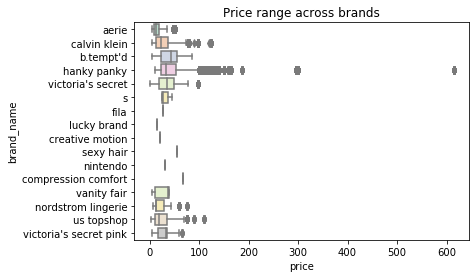

In [23]:
sns.boxplot( x=data["price"], y=data["brand_name"], palette = "Pastel2").set_title('Price range across brands')

In [45]:
pip install numba==0.53

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [283]:
#2.Topic modelling on the product description on the brand.


In [46]:
from bertopic import BERTopic

In [47]:
col_description = data['description'][0:1000]

In [48]:
col_description = col_description.apply(deletenumbers)

In [49]:
model = BERTopic(verbose=True)
docs = col_description.to_list()
topics, probabilities = model.fit_transform(docs)

2022-03-10 09:12:03,105 - BERTopic - Transformed documents to Embeddings


2022-03-10 09:12:17,501 - BERTopic - Reduced dimensionality with UMAP
2022-03-10 09:12:17,616 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [28]:
model.get_topic_freq().head(11)

Topic  Count
0       0     35
2       2     30
1       1     30
3       3     29
4       4     28
5       5     28
6       6     28
7      10     27
8       7     27
9       8     27
10      9     27

In [284]:
# en la anterior tabla podemos ver los temas  que se generaron por su frecuencia relativa.


In [51]:
model.get_topic(6)

[('extra', 0.09213195162393024),
 ('comfort', 0.08284279318862425),
 ('hirise', 0.06738010311052448),
 ('grannys', 0.06738010311052448),
 ('not', 0.06286471859582571),
 ('higher', 0.06286471859582571),
 ('laced', 0.05702136817950117),
 ('and', 0.04723154141734618),
 ('no', 0.04709917474216192),
 ('amount', 0.0419647034150302)]

In [ ]:
# Para entender mejor el modelado pintamos la siguente grafica.
#esta con Cada círculo indica un tema y su tamaño es la frecuencia del tema en todos los documentos.

In [52]:
model.visualize_topics()

In [285]:
#En la siguente grafica podemos notar las palabras principales por cada tema, para el tema 7[fit,you,detail,cotton,vback]

In [53]:
model.visualize_barchart()

# 3.What are the most common color used by different brands?// Cuáles son los colores más comunes utilizados por las diferentes marcas?

In [32]:
colors_first = data.groupby(['brand_name','color'])['color'].agg({'count'})
df_count_first = colors_first.groupby(level=0).agg('idxmax')
df_count_first = colors_first.loc[df_count_first['count']].reset_index()
df_count_first

brand_name          color  count
0                    aerie     True Black   4401
1                b.tempt'd          Black   6890
2             calvin klein          Black   5407
3      compression comfort          Black      1
4          creative motion  Dazzling Blue      1
5                     fila         Medium      1
6              hanky panky          Black   6968
7              lucky brand          Large      1
8                 nintendo        Peacoat      1
9       nordstrom lingerie          Black    158
10                       s      Baja Blue      1
11               sexy hair     Cappuccino      1
12              us topshop          BLACK    448
13             vanity fair     Star White    345
14       victoria's secret          Black  17010
15  victoria's secret pink     pure black   7101

#  4.Analyses on the product rating//Análisis sobre la calificación del producto.

In [286]:
# se agrupan  los productos por categoria para poder de esta forma de analizarlos con respecto a la calificacion. 

In [34]:
categories = {
    "bra" : ["bra", "push-up", "classic", "tomgirl", "collections", "longline", "bridget", "hannah", "audrey", "lorna jane", "katie", "brooke", "push", "padded", "demi", "scoop", "full coverage", "wireless", "plunge"],
    "panty" : ["panty", "panties", "brief", "hiphugger","cheekies", "thong", "hipster", "cheekster", "short", "bottom", "undies"],
    "bikini" : ["bikini", "triangle", "one-piece", "one piece", "high-neck", "hineck"],
    "top" : ["tee", "top", "tank", "halter", "bandeau", "racerback", "cami", "crop"],
    "lingerie": ["slip", "garter", "babydoll", "lingerie", "teddy", "sleepwear", "fishnet", "robe", "kimono", "bodysuit", "romper", "tunic"],
    "shapewear": ["shapewear", "bustier"],
    "socks" : ["sock"],
    "leggings": ["legging"],
    "bottle": ["bottle"],
    "hoodie" : ["full-zip"],
    "kit" : ["kit", "duffle"],
    "petal": ["petal"]
    
}
def standardize_product_category(row):
    product_category = row["product_category"]
    product_name = row["product_name"]
    
    product_name = product_name.lower()
    product_category = product_category.lower()
    for group, items in categories.items():
        for item in items:
            if item in product_category:
                return group

    for group, items in categories.items():
        for item in items:
            if item in product_name:
                return group

    return product_category

        

data["product_group"] = data.apply(standardize_product_category, axis=1)

In [35]:
data.head()

product_name   mrp  price  \
0  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
1  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
2  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
3  Aerie Everyday Loves Lace Cheeky  12.5   12.5   
4  Aerie Everyday Loves Lace Cheeky  12.5   12.5   

                                             pdp_url brand_name  \
0  https://www.ae.com/aerie-everyday-loves-lace-c...      aerie   
1  https://www.ae.com/aerie-everyday-loves-lace-c...      aerie   
2  https://www.ae.com/aerie-everyday-loves-lace-c...      aerie   
3  https://www.ae.com/aerie-everyday-loves-lace-c...      aerie   
4  https://www.ae.com/aerie-everyday-loves-lace-c...      aerie   

  product_category retailer  \
0         Cheekies    Ae US   
1         Cheekies    Ae US   
2         Cheekies    Ae US   
3         Cheekies    Ae US   
4         Cheekies    Ae US   

                                         description  rating  review_count  \
0  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
1  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
2  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
3  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   
4  Introducing Everyday Loves™: Made with love. E...     5.0           8.0   

                                    style_attributes  \
0  ["Soft lace with the right amount of stretch",...   
1  ["Soft lace with the right amount of stretch",...   
2  ["Soft lace with the right amount of stretch",...   
3  ["Soft lace with the right amount of stretch",...   
4  ["Soft lace with the right amount of stretch",...   

                          total_sizes                      available_size  \
0  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
1  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
2  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
3  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   
4  ["XS", "S", "M", "L", "XL", "XXL"]  ["XS", "S", "M", "L", "XL", "XXL"]   

          color product_group  
0  Rugged Green         panty  
1  Natural Nude         panty  
2    True Black         panty  
3         White         panty  
4    Royal Navy         panty

Text(0.5, 1.0, 'Analyses on the product rating')

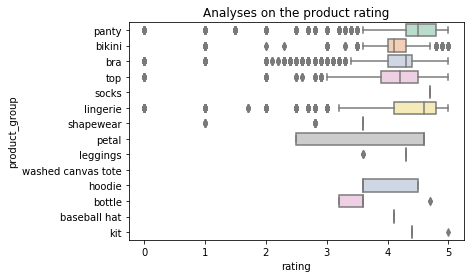

In [37]:
sns.boxplot( x=data["rating"], y=data["product_group"], palette = "Pastel2").set_title('Analyses on the product rating')

# Predicción 

In [117]:
data_train=data[['brand_name','product_group','price']]
data_train

brand_name product_group  price
0                   aerie         panty   12.5
1                   aerie         panty   12.5
2                   aerie         panty   12.5
3                   aerie         panty   12.5
4                   aerie         panty   12.5
...                   ...           ...    ...
613138  victoria's secret      lingerie   48.0
613139  victoria's secret      lingerie   48.0
613140  victoria's secret      lingerie   48.0
613141  victoria's secret      lingerie   48.0
613142  victoria's secret      lingerie   48.0

[613143 rows x 3 columns]

In [118]:
data_train['brand_name']=data_train['brand_name'].replace('aerie',1)
data_train['brand_name']=data_train['brand_name'].replace('calvin klein',2)
data_train['brand_name']=data_train['brand_name'].replace("b.tempt'd",3)
data_train['brand_name']=data_train['brand_name'].replace('hanky panky',4)
data_train['brand_name']=data_train['brand_name'].replace("victoria's secret",5)
data_train['brand_name']=data_train['brand_name'].replace('s',6)
data_train['brand_name']=data_train['brand_name'].replace('fila',7)
data_train['brand_name']=data_train['brand_name'].replace('lucky brand',8)
data_train['brand_name']=data_train['brand_name'].replace('creative motion',9)
data_train['brand_name']=data_train['brand_name'].replace('sexy hair',10)
data_train['brand_name']=data_train['brand_name'].replace('nintendo',11)
data_train['brand_name']=data_train['brand_name'].replace('compression comfort',12)
data_train['brand_name']=data_train['brand_name'].replace('vanity fair',13)
data_train['brand_name']=data_train['brand_name'].replace('nordstrom lingerie',14)
data_train['brand_name']=data_train['brand_name'].replace('us topshop',15)
data_train['brand_name']=data_train['brand_name'].replace("victoria's secret pink",16)



In [119]:
data_train['product_group']=data_train['product_group'].replace('bra',1)
data_train['product_group']=data_train['product_group'].replace('panty',2)
data_train['product_group']=data_train['product_group'].replace('bikini',3)
data_train['product_group']=data_train['product_group'].replace('top',4)
data_train['product_group']=data_train['product_group'].replace('lingerie',5)
data_train['product_group']=data_train['product_group'].replace('shapewear',6)
data_train['product_group']=data_train['product_group'].replace('socks',7)
data_train['product_group']=data_train['product_group'].replace('leggings',8)
data_train['product_group']=data_train['product_group'].replace('bottle',9)
data_train['product_group']=data_train['product_group'].replace('hoodie',10)
data_train['product_group']=data_train['product_group'].replace('kit',11)
data_train['product_group']=data_train['product_group'].replace('petal',12)
data_train['product_group']=data_train['product_group'].replace('washed canvas tote',13)
data_train['product_group']=data_train['product_group'].replace('baseball hat',14)


In [120]:
data_train

brand_name  product_group  price
0                1              2   12.5
1                1              2   12.5
2                1              2   12.5
3                1              2   12.5
4                1              2   12.5
...            ...            ...    ...
613138           5              5   48.0
613139           5              5   48.0
613140           5              5   48.0
613141           5              5   48.0
613142           5              5   48.0

[613143 rows x 3 columns]

In [121]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613143 entries, 0 to 613142
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   brand_name     613143 non-null  int64  
 1   product_group  613143 non-null  int64  
 2   price          613143 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 14.0 MB


In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt

In [123]:
X=data_train.drop(['price'],axis=1)
print(X.shape)
X

(613143, 2)


brand_name  product_group
0                1              2
1                1              2
2                1              2
3                1              2
4                1              2
...            ...            ...
613138           5              5
613139           5              5
613140           5              5
613141           5              5
613142           5              5

[613143 rows x 2 columns]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, data_train['price'], test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(429200, 2)
(429200,)
(183943, 2)
(183943,)


In [125]:
lr = LinearRegression()

In [126]:
lr.fit(X_train, y_train)

LinearRegression()

In [127]:
lr.predict(X_test)
pred = lr.predict(X_test)

# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 13.664362114133658
Mean Squared Error: 326.69273013881315
Mean Root Squared Error: 18.074643292159685


In [149]:
p={'brand_name':5,
   'product_group':5,
   'price':[48]}

In [150]:
test_df=pd.DataFrame(data=p)
test_df

brand_name  product_group  price
0           5              5     48

In [151]:
test = test_df.iloc[:, 0:2]
test

brand_name  product_group
0           5              5

In [166]:
pred = lr.predict(test)
print('Predicted Price:', pred[0])
print('Price:',48 )

Predicted Price: 27.31979878157975
Price: 48
